## Data Analytics Project- Analyzing BMI by Region
### Maham Sohail 

In [2]:
# Import packages
import numpy as np
import pandas as pd

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import geopandas as gpd

# Package for statistical analyses
import scipy.stats as stats

In [ ]:
# upload dataset
x = pd.read_csv('insurance.csv')

# print only first few rows
print(x.head())

### Introduction

The "Insurance Premium Charges" dataset showcases medical costs billed by health insurance
and various individual demographics such as age ranges, gender, and region.The goal is to understand how the 
region may impact medical costs and the health status of individuals. Exploratory data analysis was conducted 
to get an understanding of the data. After learning more about the data, research questions were created,
accompanied by data visualization and statistical testing. 

### Data Cleaning 

The first step in a data analysis project is the data cleaning process to ensure standardization. Data could consist of N/A values, negative numbers, or out-of-place values. To find any "N/A" or null values, "is.null()" was coded to find 0 null values in the dataset. Next, to check for negative numbers in the "charges" column, a "for loop" was created to iterate through each value. According to this code, there are no negative values in the charges column.  

In [9]:
# Data Cleaning 

# Check for any null values in the dataset
x.isnull().any()
               
# Check for any negative values in the "charges" column
for values in x["charges"]:
    if values < 0:
        print(items.count())
    else:
        print("There are no negative values in the charges column")
        break


### Exploratory Analysis

First, the data was uploaded using the "read_csv" module. There are a total of 1338 rows and 7 columns in the dataset.
The percentages for genders in the dataset are 50.5% females and 49.4% males. There are fewer smokers than there are smokers (1064 non-smokers and 274 smokers). The average insurance charges based on the region were coded to find that southeast residents spend the most on health insurance with an average of $14735.

Average insurance charges by age were calculated to find that participants who are 64 years old have spent the most on 
insurance with an average of$23275. The average BMI for females was 30.77 and 30.94 for males. 

Next, BMI was further analyzed to find the weight status of individuals. According to metrics by the CDC BMI can be used 
to categorize various weight ranges. A "for loop" was created to identify an individual's BMI to a particular category. 
A new column was created, named "weight status" with this iteration. The total count of obese individuals is 716. 
Obese participants who are 47 years old have an average BMI of 37.03. Finally, male obese individuals spend slightly
more on medical cost charges with an average of $16626. 

In [ ]:
# Exploratory Analysis 

# Number of rows and columns
rows_columns = x.shape
print(rows_columns)

# Percentages of male and female participants
gender_count = x["sex"].value_counts(normalize=True)
print(gender_count)

# Counts of smokers and non-smokers
smoker_count = x["smoker"].value_counts()
print(smoker_count)

# Average medical cost charges for each region
mean_charges_region = x[['charges', 'region']].groupby(['region']).agg('mean')
print(mean_charges_region)

# Average medical cost charges by age
mean_charges = x[['age', 'charges']].groupby(['age']).agg('mean')
print(mean_charges)

# Average BMI by gender
bmi_gender = x[['sex', 'bmi']].groupby(['sex']).agg('mean')
print(bmi_gender)

# Categorize BMI by "weight status" based on BMI score and create a new column
result = []
for value in x["bmi"]:
    if value < 18.5:
        result.append("Underweight")
    elif value <= 24.9:
        result.append("Healthy")
    elif value <= 29.9:
        result.append("Overweight")
    else:
        result.append("Obese")

x["weight-status"] = result
print(x)

# Frequency of individuals who are obese
weight_status_counts = pd.crosstab(index=x['weight-status'], columns='count')
print(weight_status_counts)

# Categorize weight status of each participant by bmi and gender
hello = x.pivot_table('bmi', index=['sex'], columns='weight-status', aggfunc=np.mean)
print(hello)

# Average medical cost charges by gender
insurance_charges_gender = x.pivot_table('charges', index=['sex'], columns='weight-status', aggfunc=np.mean)
print(insurance_charges_gender)

# Of obese individuals, which age group had the highest BMI levels?
insurance_charges_gender = x.pivot_table('bmi', index=['age'], columns='weight-status', aggfunc=np.mean)
print(insurance_charges_gender)

### Statistical Analysis 

#### Is the average BMI higher for those who live in the southwest versus the northwest

### Data Visualization

According to the visualization, the median distribution of BMI rates among individuals who live in the southwest is 
slightly higher compared to individuals who live in the northwest.

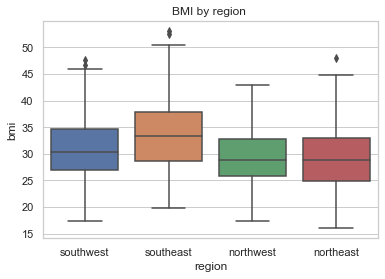

In [5]:
sns.boxplot(x="region", y="bmi", data=x)
plt.xlabel("region")
plt.ylabel("bmi")
plt.title("BMI by region ")
plt.show()

### Hypothesis Testing

Null Hypothesis: The average BMI for individuals living in various regions in the United States is the same.

Alternative Hypothesis: The average BMI is greater for individuals living in the southwest 
then for individuals in the northwest.

alpha- 0.05 (comparison value)

In [10]:
southwest_bmi = x.loc[x['region'] == 'southwest']['bmi'].values
northwest_bmi = x.loc[x['region'] == 'northwest']['bmi'].values
stats.mannwhitneyu(southwest_bmi, northwest_bmi, use_continuity=True, alternative="greater")

### Conclusion
At a significance level of 0.05, we reject the null hypothesis and conclude that there is statistically significant 
evidence that BMI for individuals in the southwest is higher than for individuals in the northwest.
p-value=0.0012027197920135202

### Findings

From statistical testing, we learned that individuals from the southwest have higher BMI rates than those who live in 
the northwest. Researchers could utilize this information to evaluate the differences between each region to determine which aspects of everyday life or culture contribute to high BMI rates and help bring awareness 
through health care providers, social media, and other methods. 


### References
https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset
